In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle
from sklearn.cluster import DBSCAN
from sklearn import cluster
import astropy.coordinates as coord
from astropy import units as u

import sys, os
sys.path.append('C:\\Users\Quentin\\Documents\\ALMA_CHILI\\gaia-shock\\src')

## directory
rootdir = r'C:\Users\Quentin\Documents\ALMA_CHILI'
wdir    = r'%s\products'%(rootdir)
#notedir = r'%s\gaia-shock\notebooks_Quentin'%(rootdir)

os.chdir(wdir)  # to change the current directory

import gaia_utils_quentin as gu

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


## ------------------------------------------------------

In [26]:
a = 1
b = 0
if a == 1 or b == 2 :
    print("Okkk")

Okkk


In [27]:
cluster_file = open("BrowseTargets.18292.1530479692.gaia.selected.txt", "r")
Stop = False
line = cluster_file.readline()
i = 0
clusters = []
while not Stop :
    i += 1
    line = cluster_file.readline()
    if line == "" : break
    Z = line.split('|')
    ncluster = int(Z[7])
    dist = int(Z[8])
    name = Z[1][:Z[1].find(" ",1+Z[1].find(" "))]
    
    if ncluster > 600 and dist < 500 :
        clusters.append((name,ncluster,dist))
    
    #if i == 30 : Stop = True

for c in clusters :
    print(c)

('NGC 2516', 698, 373)
('Platais 6', 847, 347)
('Collinder 65', 1426, 325)
('Per OB2', 4262, 400)
('Melotte 20', 621, 175)


In [2]:
voname_list = ["NGC2682-4.0deg-0.2err.vot", "NGC2516-6.0deg-0.2err.vot", "NGC6811-1.0deg-0.2err.vot",
               "NGC1647-4.0deg-0.2err.vot", "NGC1039-3.0deg-0.1err.vot", "NGC1912-2.0deg-0.2err.vot",
               ]
voname = voname_list[0]

source = gu.source()
source.read_votable(voname)
source.convert_filter_data()
#source.convert_to_cartesian(centering=False)
source.normalization_normal()

## NGC2682-4.0deg-0.2err.vot read...
## Total stars: 46444
## Density star per pc^3: 0.00413

## Conversion done...
## Stars selected: 45808
## Normalization done on filtered data..


In [5]:
tab_source = []
for voname in voname_list :
    source = gu.source()
    source.read_votable(voname)
    source.convert_filter_data()
    source.convert_to_cartesian(centering=False)
    tab_source.append(source)

## NGC2682-4.0deg-0.2err.vot read...
## Total stars: 46444
## Density star per pc^3: 0.00413

## Conversion done...
## Stars selected: 45808
## NGC2516-6.0deg-0.2err.vot read...
## Total stars: 80414
## Density star per pc^3: 0.03218

## Conversion done...
## Stars selected: 78796
## NGC6811-1.0deg-0.2err.vot read...
## Total stars: 12084
## Density star per pc^3: 0.00925

## Conversion done...
## Stars selected: 11888
## NGC1647-4.0deg-0.2err.vot read...
## Total stars: 39435
## Density star per pc^3: 0.01056

## Conversion done...
## Stars selected: 38750
## NGC1039-3.0deg-0.1err.vot read...
## Total stars: 30131
## Density star per pc^3: 0.00015

## Conversion done...
## Stars selected: 29219
## NGC1912-2.0deg-0.2err.vot read...
## Total stars: 28371
## Density star per pc^3: 0.00658

## Conversion done...
## Stars selected: 28000


In [15]:
dist = source.df[:,0]
lgal = source.df[:,1]
bgal = source.df[:,2]

for i in range(len(lgal)):
    c = coord.SkyCoord(l=lgal[i]*u.degree, b=bgal[i]*u.degree, distance=dist[i]*u.pc, frame='galactic')
    c2 = c.transform_to(c)

In [39]:
print(source.data['ra'][0])

133.7174304835968


In [51]:
#c = coord.SkyCoord(ra=source.data['ra'][0]*u.degree, dec=source.data['dec'][0]*u.degree, frame='galactic')
c = coord.SkyCoord(ra=source.data['ra'][0]*u.degree, dec=source.data['dec'][0]*u.degree)
print(c)
c.galactic
print(c.galactic,"\n")
print(source.data['l'][0],source.data['b'][0])

<SkyCoord (ICRS): (ra, dec) in deg
    (133.71743048, 8.20231449)>
<SkyCoord (Galactic): (l, b) in deg
    (219.94441755, 31.12253872)> 

219.94440974804965 31.12253715595914


In [50]:
print(c.galactic.b)

31d07m21.1394s


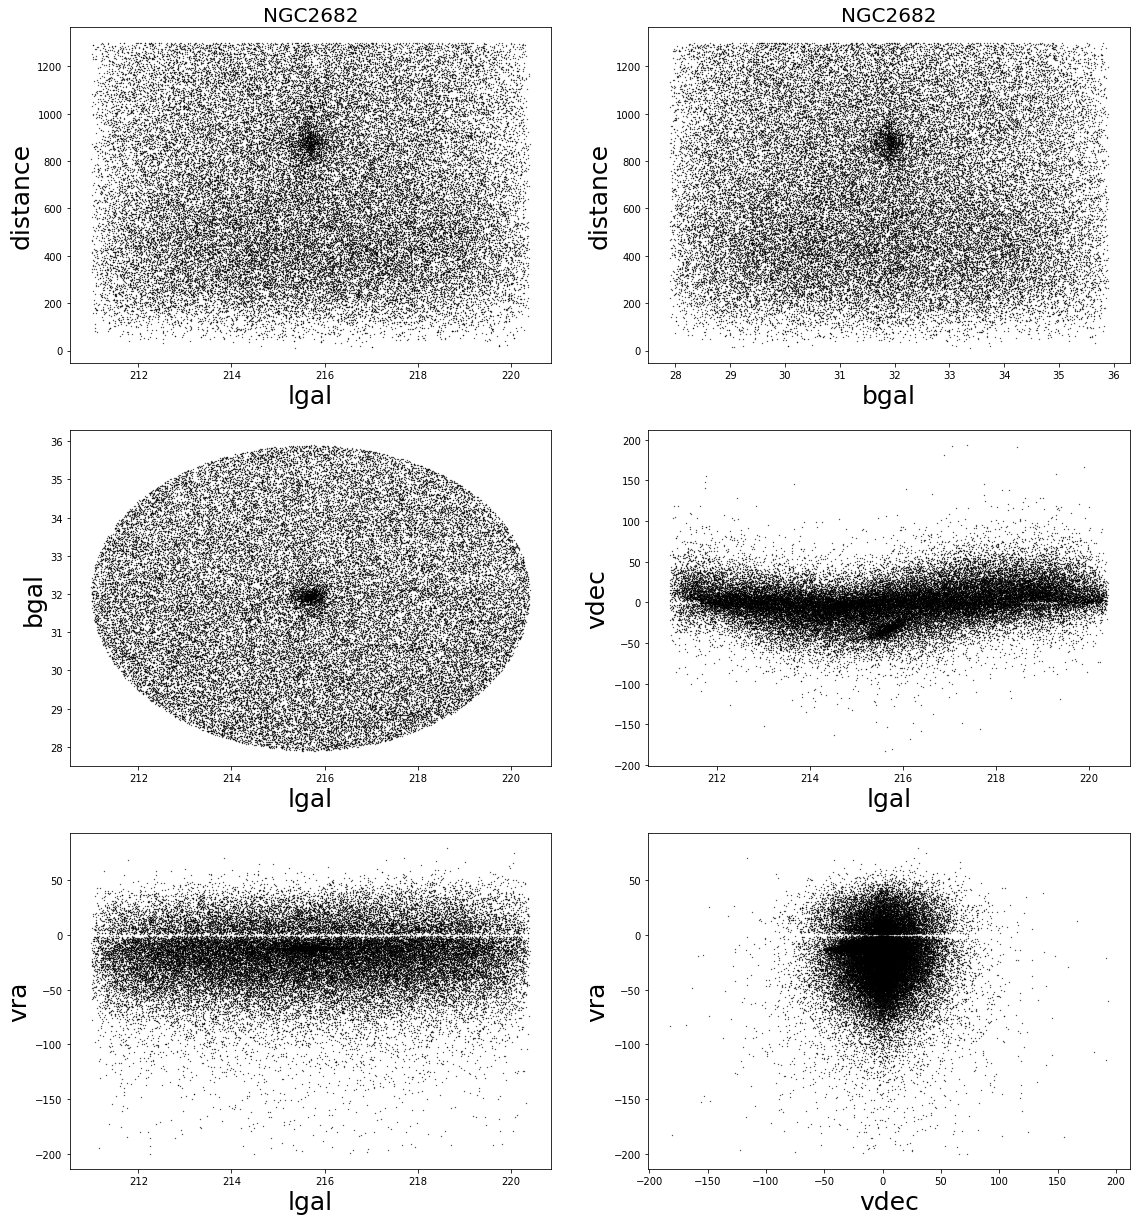

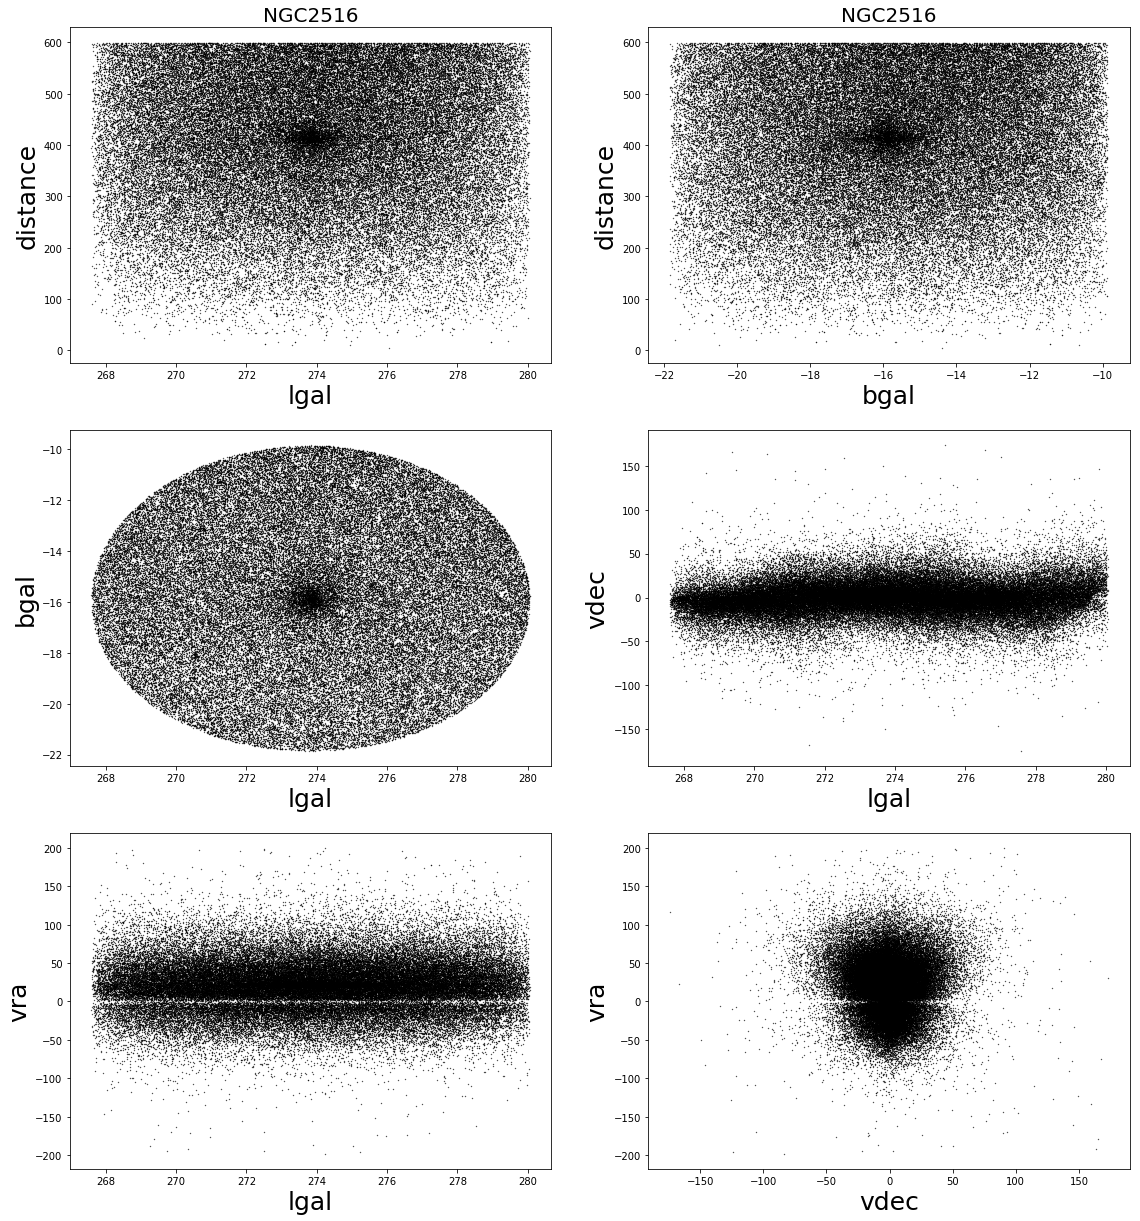

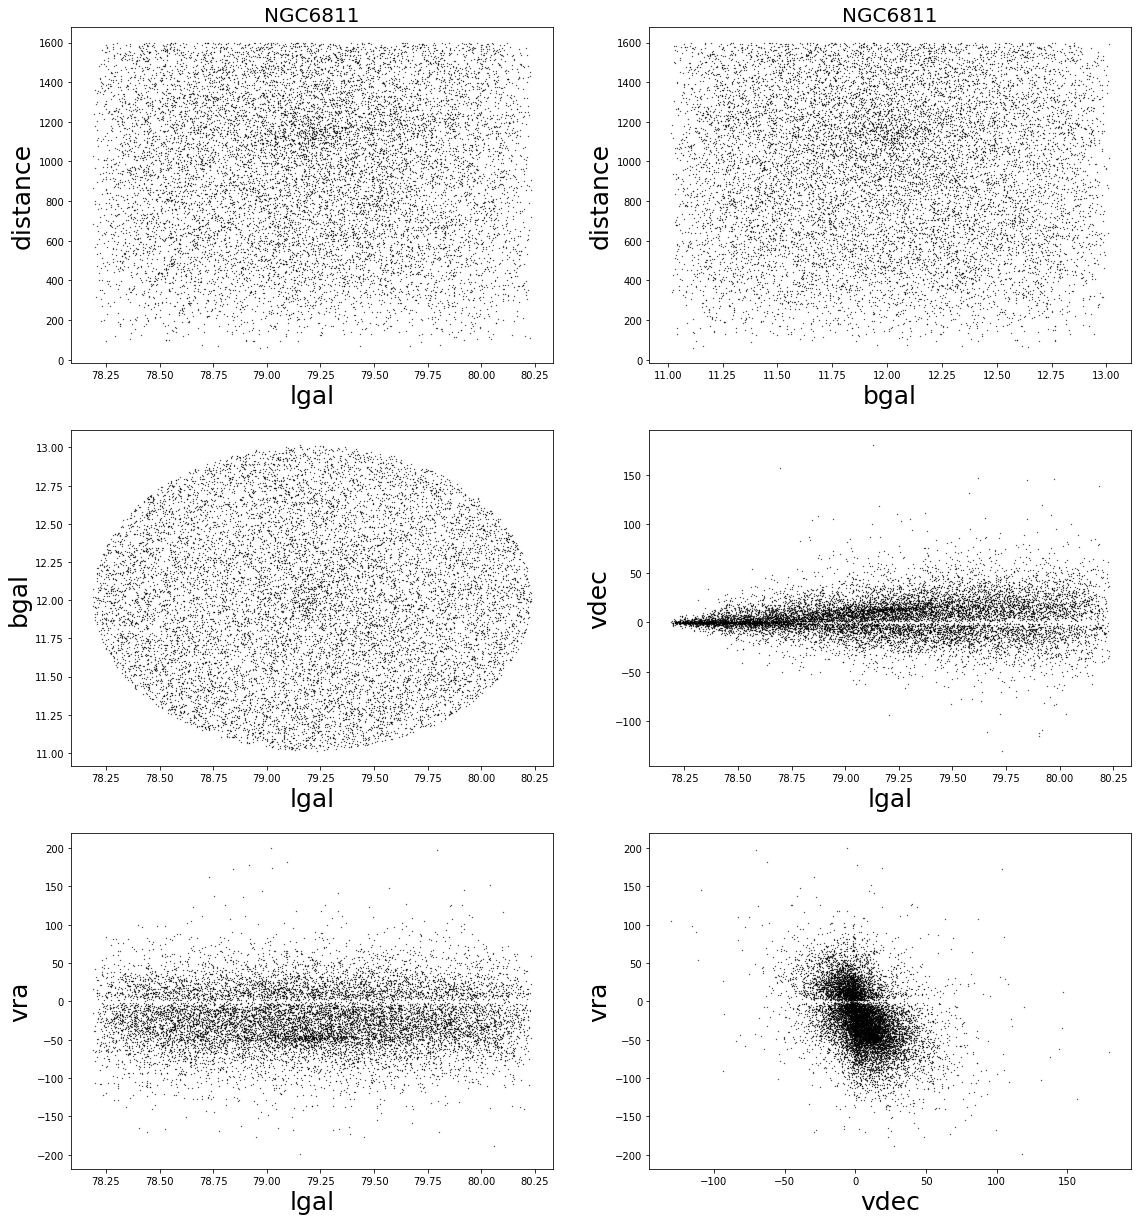

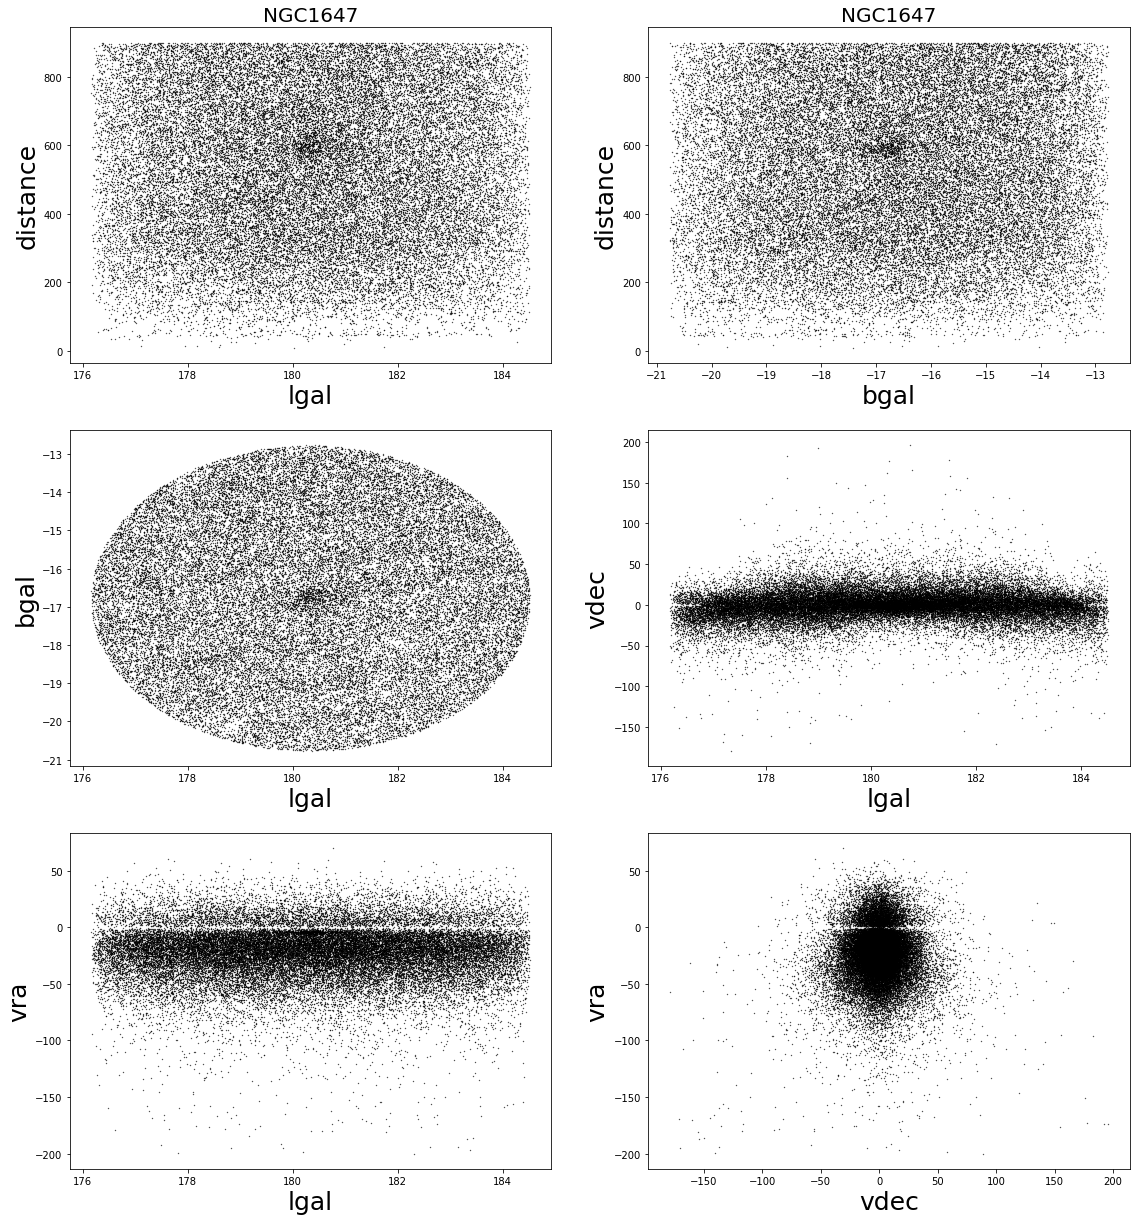

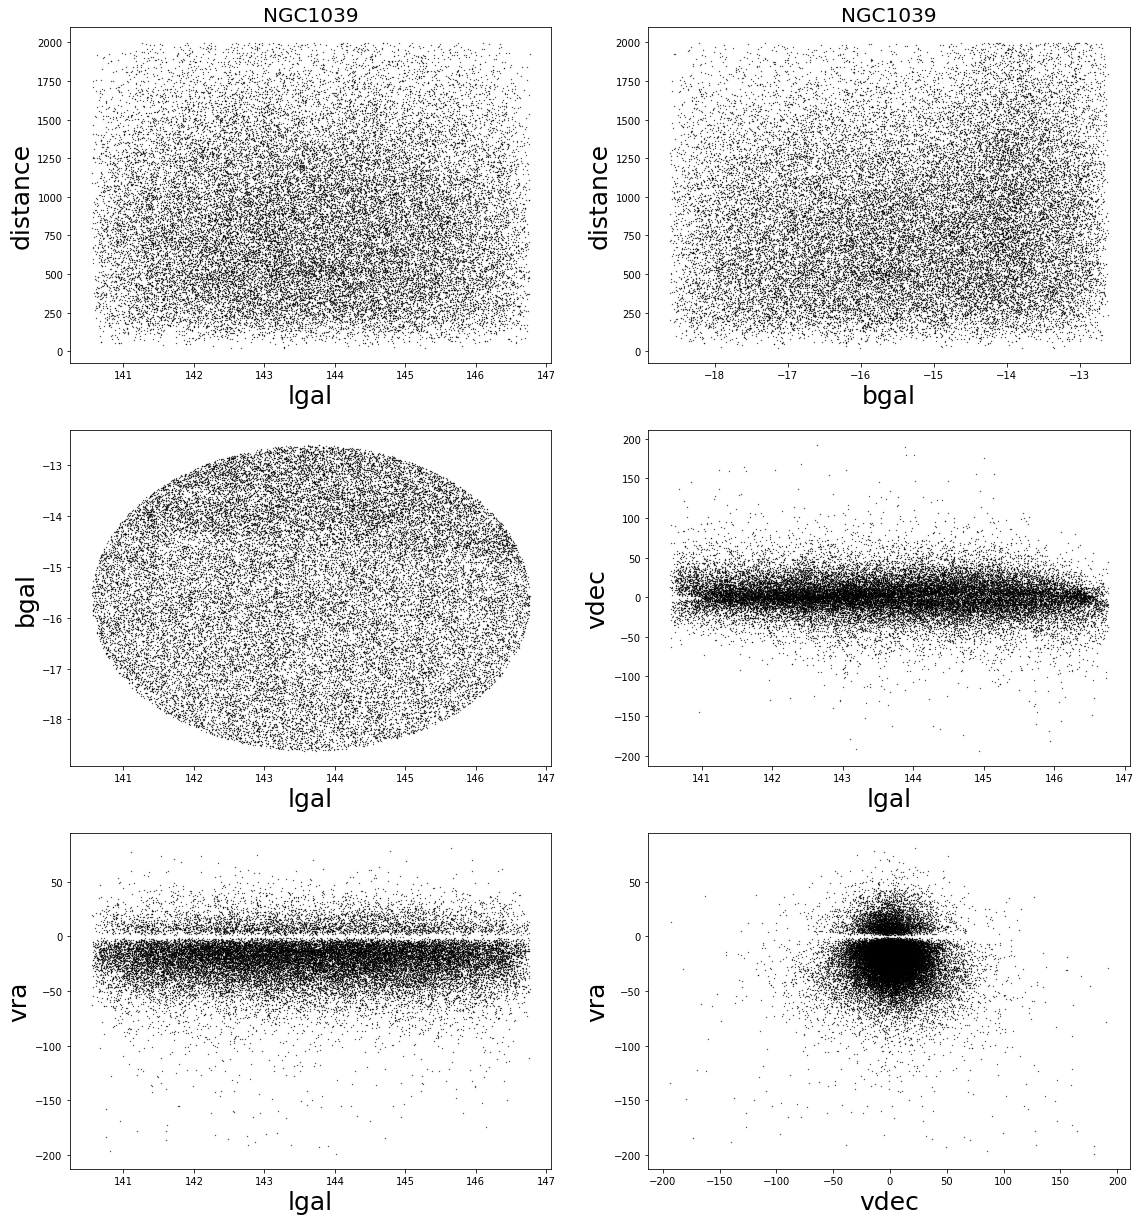

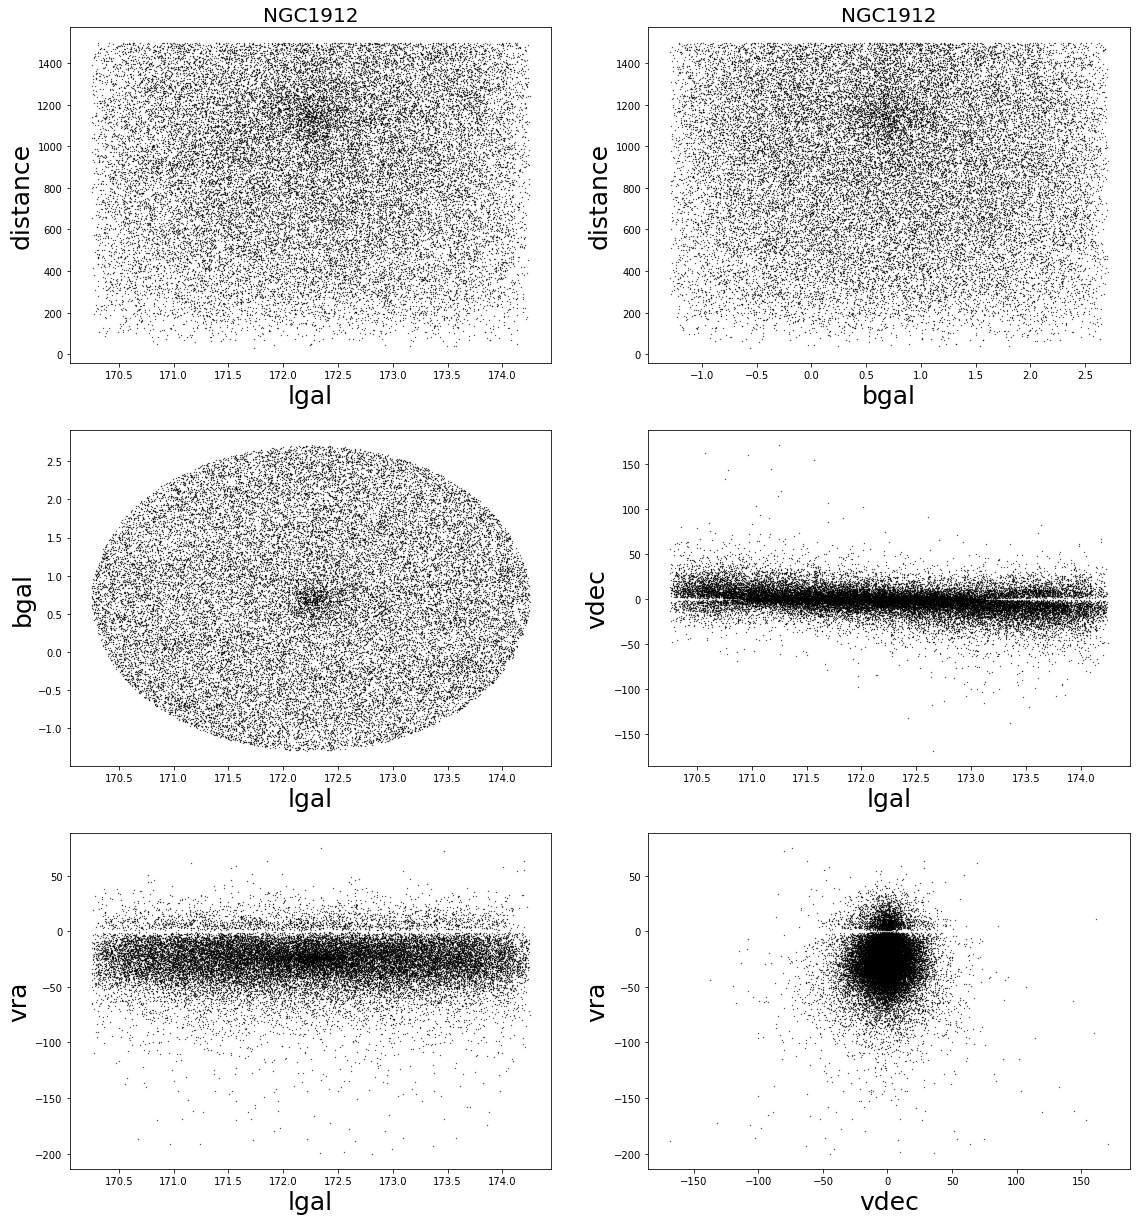

In [14]:
for source in tab_source :
    source.plot_information(size=0.1,cartesian=False,HRD=False)

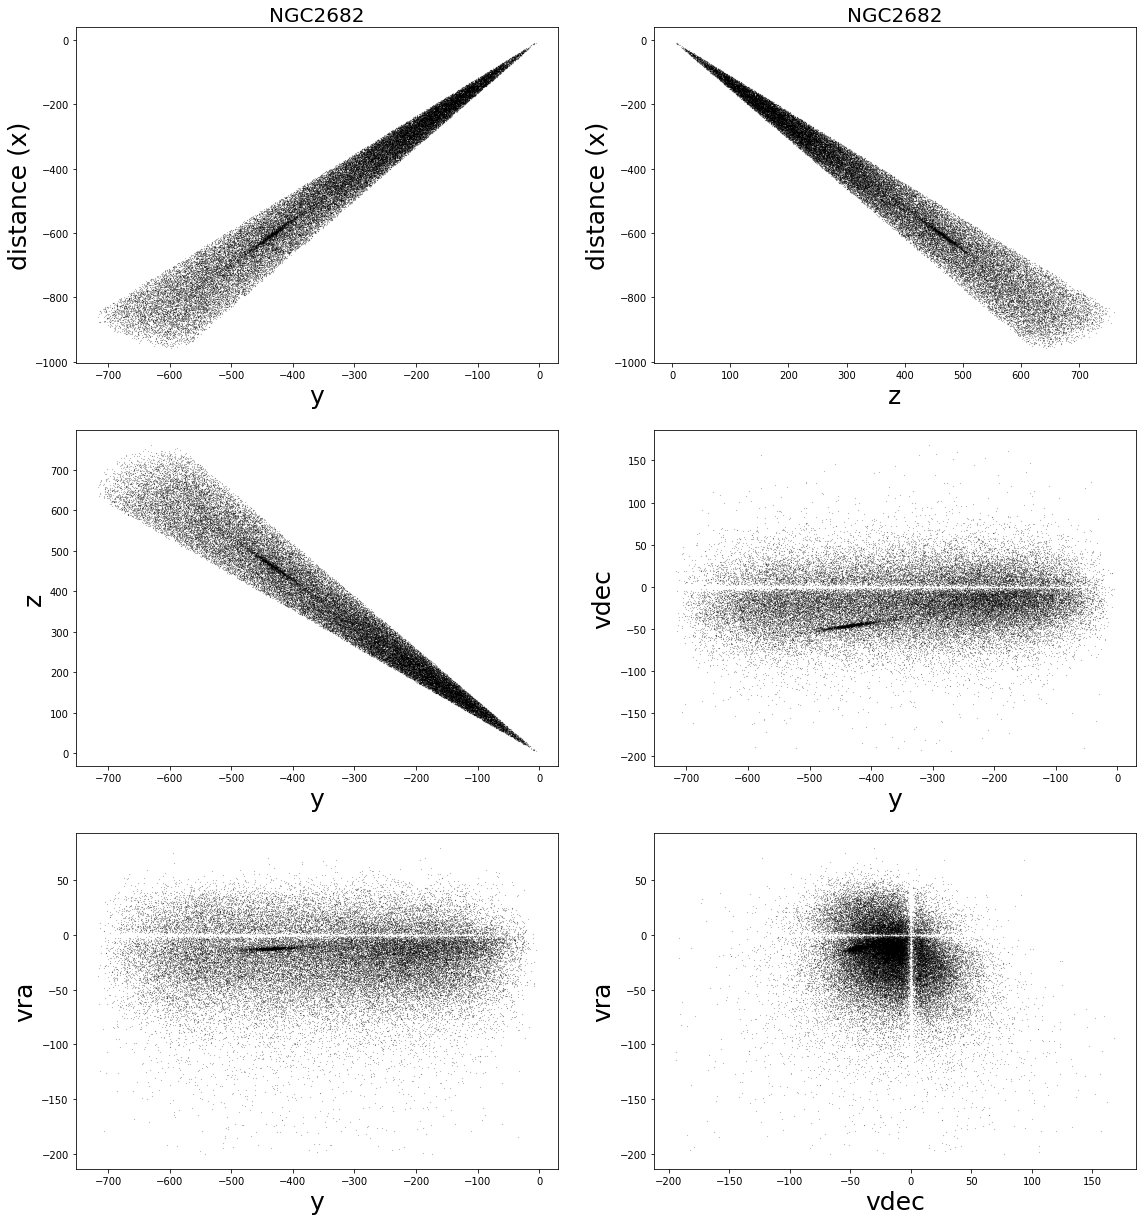

In [21]:
source.plot_information(size=0.01,cartesian=True,HRD=False)

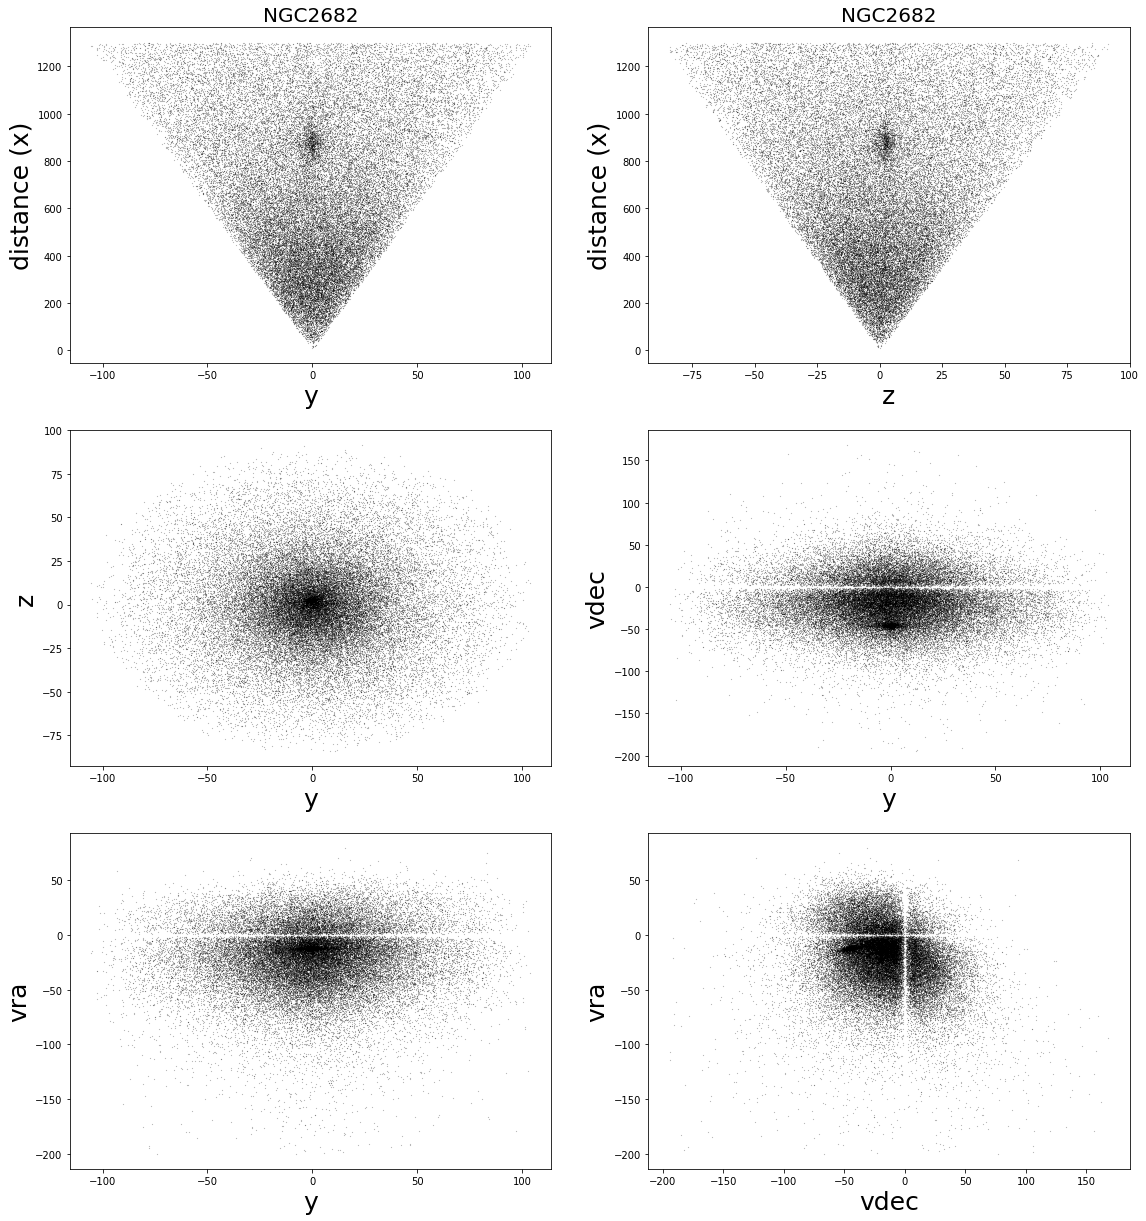

In [37]:
source.convert_to_cartesian(centering=True)
source.plot_information(size=0.01,cartesian=True,HRD=False)

In [36]:
y1 = np.argmax(source.dfcart[:,1])
y2 = np.argmin(source.dfcart[:,1])
a = source.dfcart[y1,:3] - source.dfcart[y2,:3]
print(np.sqrt(a[0]**2+a[1]**2+a[2]**2))

1286.5053683620265


In [17]:
c

<SkyCoord (Galactic): (l, b, distance) in (deg, deg, pc)
    (173.3568526, 0.61475063, 884.00689184)>

<class 'numpy.ma.core.MaskedArray'>
46444
3089
<class 'numpy.ma.core.MaskedArray'>
46444
3089
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


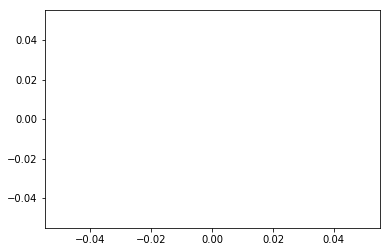

In [21]:
source = tab_source[0]
radv = source.data['radial_velocity']
radv_err = source.data['radial_velocity_error']
print(type(radv))
print(len(radv))
print(radv.count())

print(type(radv_err))
print(len(radv_err))
print(radv_err.count())

radv = np.ma.filled(radv, -999999.)
radv_err = np.ma.filled(radv_err, -999999.)
i1 = np.where((radv >= -200) & (radv < -200))[0]

radv = radv[i1]
radv_err = radv_err[i1]

print(type(radv))
print(type(radv_err))
plt.plot(radv,radv_err)
plt.show()

In [ ]:
convert_filter_data(source)

In [6]:
###################################################################################################
def convert_filter_data(self, dist_range = [0., 2000], vra_range = [-200,200], vdec_range = [-200.,200], without_mag = True) :

    lgal = self.data['l']
    bgal = self.data['b']
    pmas = self.data['parallax']
    distance = 1000. / np.ma.filled(pmas, -999999.)    #distance = 1000/parallax
    pmra = np.ma.filled(self.data['pmra'], -9999999.)   # PM RA
    pmdec= np.ma.filled(self.data['pmdec'],-9999999.)   # PM Dec
    vdec = 4.74 * pmdec / pmas   ##? (pour )
    vra  = 4.74 * pmra * np.cos(self.data['dec']) / pmas  # pour avoir des km.s-1


    g  =  np.ma.filled(self.data['phot_g_mean_mag'], 99.)
    bp =  np.ma.filled(self.data['phot_bp_mean_mag'], 999.)
    rp =  np.ma.filled(self.data['phot_rp_mean_mag'], 9999.)

    #filtering

    i1 = np.where((distance >= dist_range[0]) & (distance < dist_range[1]))
    i2 = np.where((vra >= vra_range[0]) & (vra < vra_range[1]))
    i12 = np.intersect1d(i1,i2)
    i3 = np.where((vdec >= vdec_range[0]) & (vdec < vdec_range[1]))
    ifinal = np.intersect1d(i12,i3)

    # if we don't consider masked magnitude
    if without_mag :
        i1 = np.where(g < 99.)[0]
        i2 = np.where(bp < 99.)[0]
        i12 = np.intersect1d(i1,i2)
        i3 = np.where(rp < 99.)[0]
        i4 = np.intersect1d(i12,i3)
        ifinal = np.intersect1d(i4,ifinal)

    print()

    gbar = g[ifinal] + 5*np.log10(pmas[ifinal]) + 2

    self.df = np.array([distance[ifinal], lgal[ifinal], bgal[ifinal], vra[ifinal], vdec[ifinal], gbar, g[ifinal]-rp[ifinal], bp[ifinal]-g[ifinal]]).T

    print("## Conversion done...")
    print("## Stars selected: %d"%(len(ifinal)))